In [1]:
import numpy as np
ff = np.loadtxt("data/fftfluidgrowth")
df = np.loadtxt("data/deepfluidgrowth")
pf = np.loadtxt("data/pinnfluidgrowth")

/home/sn/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


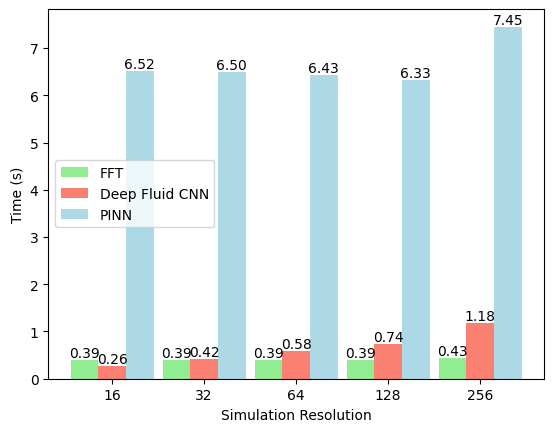

In [2]:
import matplotlib.pyplot as plt
loc = np.arange(5) 
tic = ["16", "32", "64", "128", "256"]
fig, ax = plt.subplots()
ax.bar(loc-0.3, width=0.3, height=ff, label="FFT", color="lightgreen")
ax.bar(loc,     width=0.3, height=df, label="Deep Fluid CNN", color="salmon")
ax.bar(loc+0.3, width=0.3, height=pf, label="PINN", color="lightblue")
for bars in ax.containers:
    ax.bar_label(bars, fmt="{:0.2f}")
ax.legend(loc="center left")
ax.set_xticks(loc, tic)
ax.set_xlabel("Simulation Resolution")
ax.set_ylabel("Time (s)")
plt.show()

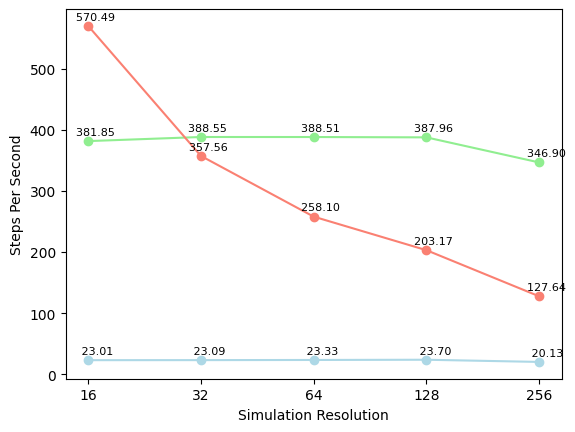

In [3]:
fig, ax = plt.subplots()
aff = 1 / (ff / 150)
adf = 1 / (df / 150)
apf = 1 / (pf / 150)
ax.plot(asf, label="FFT", color="lightgreen", marker="o")
ax.plot(adf, label="Deep Fluid CNN", color="salmon", marker="o")
ax.plot(api, label="PINN", color="lightblue", marker="o")
ax.set_xticks(loc, tic)
ax.set_xlabel("Simulation Resolution")
ax.set_ylabel("Steps Per Second")
for i in loc:
    for d in [aff, adf, apf]:
        ax.text(i, d[i]+10, "{:10.2f}".format(d[i]), ha="center", fontsize=8)
plt.show()

In [4]:
from pstats import Stats
def do(f):
    df = Stats(f).strip_dirs().sort_stats("tottime").print_stats(10)
do("data/fftfluidfull")
do("data/deepfluidfull")
do("data/pinnfluidfull")

Wed Mar 27 22:57:18 2024    data/stablefluidfull

         43410012 function calls (42570012 primitive calls) in 89.455 seconds

   Ordered by: internal time
   List reduced from 120 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   360000    7.577    0.000    7.577    0.000 {built-in method pyopencl._cl.enqueue_nd_range_kernel}
   240000    7.455    0.000    7.455    0.000 {built-in method io.open}
   120000    6.227    0.000    8.669    0.000 <pyopencl invoker for 'kernel_fft'>:6(enqueue_knl_kernel_fft)
960000/120000    6.189    0.000   11.154    0.000 persistent_dict.py:211(rec)
   240000    5.387    0.000   17.667    0.000 {built-in method _pickle.load}
   240000    4.360    0.000    4.360    0.000 {built-in method posix.stat}
   720000    2.705    0.000    4.153    0.000 posixpath.py:71(join)
    30000    2.357    0.000  101.795    0.003 solver.py:76(step)
   120000    2.106    0.000   54.698    0.000 persistent_dict.py:704(f

In [5]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
from simlib import load_simulation_data

ground = load_simulation_data("./data/datasetground.npz")
sim1 = load_simulation_data("./data/datasetpinnfluid.npz")
sim2 = load_simulation_data("./data/datasetfftfluid.npz")
sim3 = load_simulation_data("./data/datasetdeepfluid.npz")

In [6]:
vx1 = sim1.velocity_x / sim1.max_abs
vy1 = sim1.velocity_y / sim1.max_abs
vx2 = sim2.velocity_x / sim2.max_abs
vy2 = sim2.velocity_y / sim2.max_abs
vx3 = sim3.velocity_x / sim3.max_abs
vy3 = sim3.velocity_y / sim3.max_abs
vxg = ground.velocity_x / ground.max_abs
vyg = ground.velocity_y / ground.max_abs

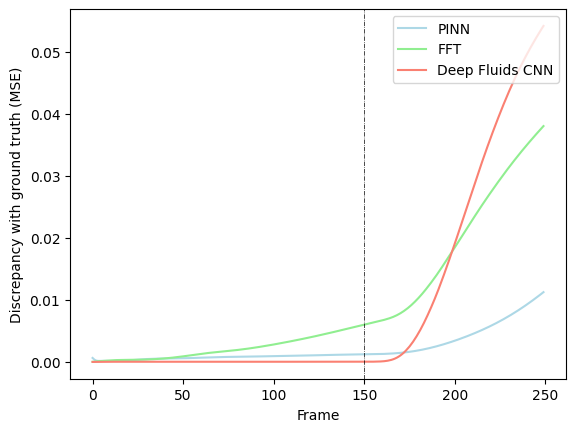

In [7]:
def mse(a, b):
    return np.square(a - b).mean()
def err(x, y, gx, gy):
    x = np.array([ mse(i, j) for i, j in zip(x, gx) ])
    y = np.array([ mse(i, j) for i, j in zip(y, gy) ])
    return x + y
fig, ax = plt.subplots()
ax.plot(err(vx1, vy1, vxg, vyg), label="PINN", color="lightblue")
ax.plot(err(vx2, vy3, vxg, vyg), label="FFT", color="lightgreen")
ax.plot(err(vx3, vy3, vxg, vyg), label="Deep Fluids CNN", color="salmon")

ax.legend(loc="upper right")
ax.set_xlabel("Frame")
ax.set_ylabel("Discrepancy with ground truth (MSE)")
ax.axvline(x=150, color="black", linewidth=0.5, linestyle="-.")

plt.show()


H


MovieWriter ffmpeg unavailable; using Pillow instead.


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


MovieWriter ffmpeg unavailable; using Pillow instead.


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


MovieWriter ffmpeg unavailable; using Pillow instead.


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


MovieWriter ffmpeg unavailable; using Pillow instead.


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


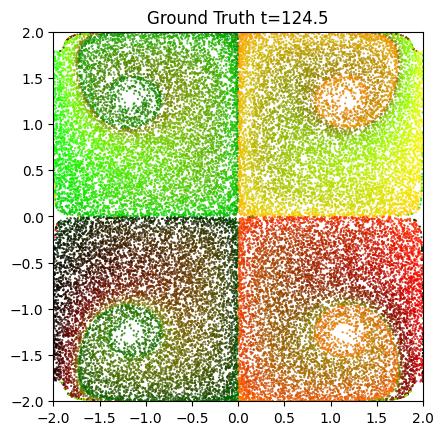

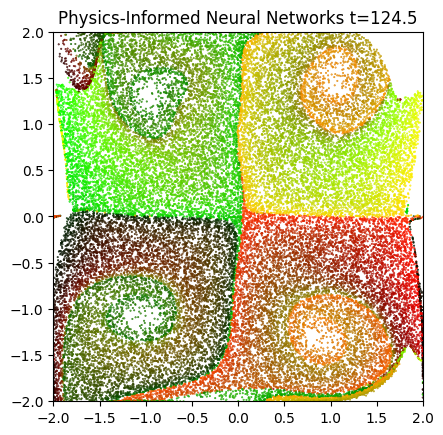

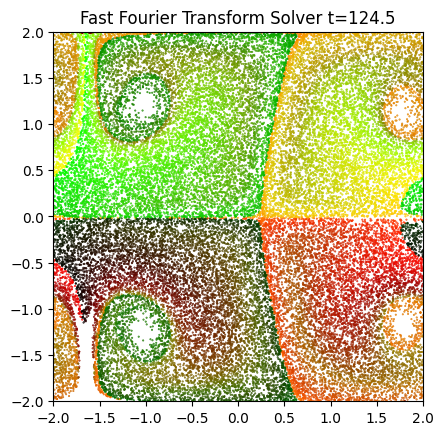

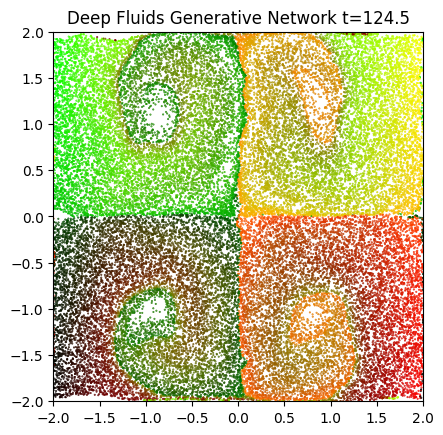

In [47]:
from scipy.interpolate import interpn
import matplotlib.animation as anim
import numpy as np
import matplotlib.cm as cm

lin = np.linspace(-2.0, 2.0, 128)
xlin = np.tile(lin, 128)
ylin = np.repeat(lin, 128)
frames = 250
row = 1
col = 5
nplots = row * col
offplots = 25
xs = np.linspace(-2.0, 2.0, 128)
ys = np.linspace(-2.0, 2.0, 128)
speed = 4 / 128 * 2
par = 200

npy = np.concatenate([np.random.uniform(-2, 2, par) for i in range(par)])
npx = np.concatenate([np.random.uniform(-2, 2, par) for i in range(par)])
ccc = np.array([((i+2)/4, (j+2)/4, 0) for i, j in zip(npx, npy)])

print("H")

def trace_particles(vx, vy):
    sx = []
    sy = []
    svx = []
    svy = []
    px = np.array([])
    py = np.array([])
    px = np.concatenate([px, npx])
    py = np.concatenate([py, npy])
    for i in range(frames):
        coords = np.array([px, py]).transpose((1, 0))
        pvx = interpn((xs, ys), vx[i], coords)
        pvy = interpn((xs, ys), vy[i], coords)
        px += pvx * speed
        py += pvy * speed
        px = (px + 2.0) % 4.0 - 2.0
        py = (py + 2.0) % 4.0 - 2.0
        sx.append(px.copy())
        sy.append(py.copy())
    return sx, sy

def plot_particles(vxs, vys, name):
    fig, (ax_p) = plt.subplots(1)
    
    ax_p.set_xticks([])
    ax_p.set_yticks([])
    pxs, pys = trace_particles(vxs, vys)
    def closure(i):
        print(i)
        ax_p.clear()
        ax_p.set_xlim(-2, 2)
        ax_p.set_ylim(-2, 2)
        ax_p.set_aspect('equal', adjustable='box')
        ax_p.scatter(pxs[i], pys[i], s=0.2, c=ccc)
        ax_p.set_title(f"{name} t={i/2}")
    a = anim.FuncAnimation(fig, closure, 250, interval=1, repeat=False)
    a.save(name + ".gif")
    
plot_particles(vxg, vyg, "Ground Truth")
plot_particles(vx1, vy1, "Physics-Informed Neural Networks")
plot_particles(vx2, vy2, "Fast Fourier Transform Solver")
plot_particles(vx3, vy3, "Deep Fluids Generative Network")
        